# Завдання на лабораторну роботу 1
## Дослідження та візуалізація даних за допомогою Python
## Мета: отримати базові навики використання Python для дослідження та візуалізації даних.

## Формула визначення варіанту

In [1]:
N = ord("Y") % 3 + 1
N

3

## 1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.

In [2]:
import csv
import numpy as np
def read_column_as_numpy_array(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Пропускаємо заголовок
        col_index = headers.index(column_name)
        data = [float(row[col_index]) for row in reader if row[col_index]]
    return np.array(data)

## 2.  Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).

In [3]:
filename = 'russia_losses_equipment(1).csv'
column_name = 'APC' 
apc_array = read_column_as_numpy_array(filename, column_name)
np.set_printoptions(threshold=np.inf)
print(apc_array)

[19369. 19355. 19339. 19306. 19304. 19256. 19236. 19209. 19192. 19156.
 19143. 19119. 19092. 19059. 19021. 18994. 18968. 18947. 18896. 18847.
 18766. 18726. 18697. 18661. 18612. 18592. 18581. 18538. 18523. 18487.
 18470. 18450. 18433. 18404. 18395. 18355. 18332. 18287. 18254. 18229.
 18199. 18175. 18111. 18072. 18053. 18002. 17969. 17939. 17895. 17876.
 17827. 17800. 17765. 17751. 17740. 17710. 17679. 17658. 17627. 17596.
 17579. 17547. 17503. 17476. 17438. 17396. 17344. 17304. 17292. 17252.
 17222. 17170. 17132. 17093. 17080. 17077. 17071. 17063. 17043. 17003.
 16955. 16938. 16925. 16906. 16897. 16878. 16878. 16869. 16848. 16821.
 16786. 16760. 16736. 16722. 16699. 16681. 16667. 16648. 16631. 16620.
 16599. 16567. 16542. 16521. 16495. 16480. 16473. 16461. 16426. 16402.
 16385. 16368. 16363. 16350. 16341. 16332. 16323. 16294. 16286. 16255.
 16238. 16211. 16203. 16161. 16141. 16103. 16095. 16074. 16050. 16039.
 16013. 16000. 15980. 15963. 15917. 15902. 15883. 15871. 15862. 15826.
 15811

## 3. Знайдіть добові втрати БТР.

In [4]:
def calculate_daily_losses(apc_array):
    reversed_array = np.flip(apc_array)
    daily_losses = np.diff(reversed_array)
    daily_losses = np.insert(daily_losses, 0, reversed_array[0])
    return daily_losses
daily_losses = calculate_daily_losses(apc_array)
print(daily_losses)

[516. 190.   0. 110.  30.  16.  38.  39.   6.  40.  14.  37.  34.  35.
  60.  40.  21.  23.  30.  96.  60.  13.  22.  17.  48.  21.  22.  19.
  28.  15.  24.  30.  16.  13.  12.  16.  25.  54.  14.  14.   3.  30.
   0.   4.  16.  12.  23.  18.   4.   8.   6.  20.  39.  22.  24.  31.
  44.  43.  33.  20.  50.  34.  47.  29.  27.  26.  48.  48.  43.  41.
  35.  27.  28.  23.  44.  48.  17.  27.  34.  24.  16.  35.  34.  20.
  27.  26.  25.  25.  28.  19.  22.  11.  12.  12.  12.  20.  41.  11.
  12.  13.  13.   8.  16.  13.   9.  12.  16.  18.   8.  11.  25.  17.
  18.  10.   4.  11.  18.   8.  18.   5.   8.  14.  28.  17.  16.   6.
  10.   1.   7.   0.  28.  17.   8.  14.   4.   8.   5.   1.   3.   0.
  34.   8.   5.   7.   6.  13.   7.   8.   9.  13.   8.   9.  12.   8.
   8.   8.   9.   7.   3.   8.   4.   6.  19.   4.  15.   6.  10.  14.
   8.   7.  11.  15.  11.  10.  17.  16.  17.  12.   6.   8.   5.   2.
   6.   3.   3.  12.  25.  18.  33.  21.  37.  27.  29.  25.  36.  37.
  18. 

## 4. Знайдіть 5 найбільших добових втрат БТР.

In [5]:
def find_top_5_daily_losses(daily_losses):
    return np.sort(daily_losses)[-5:] [::-1]
print(find_top_5_daily_losses(daily_losses))

[516. 190. 120. 110.  96.]


## 5. Визначте, скільки БТР було знищено влітку 2023 року.

In [6]:
reverse_apc_losses = daily_losses[::1]
def calculate_summer_losses():
    return np.sum(reverse_apc_losses[462:553])
print(calculate_summer_losses())

1126.0


## 6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.

In [7]:
reversed_losses = daily_losses[::1]
def average_losses(start_day, end_day):
    selected_losses = reversed_losses[start_day:end_day + 1]
    return np.mean(selected_losses)
print(average_losses(100, 500))


11.438902743142144


## 7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

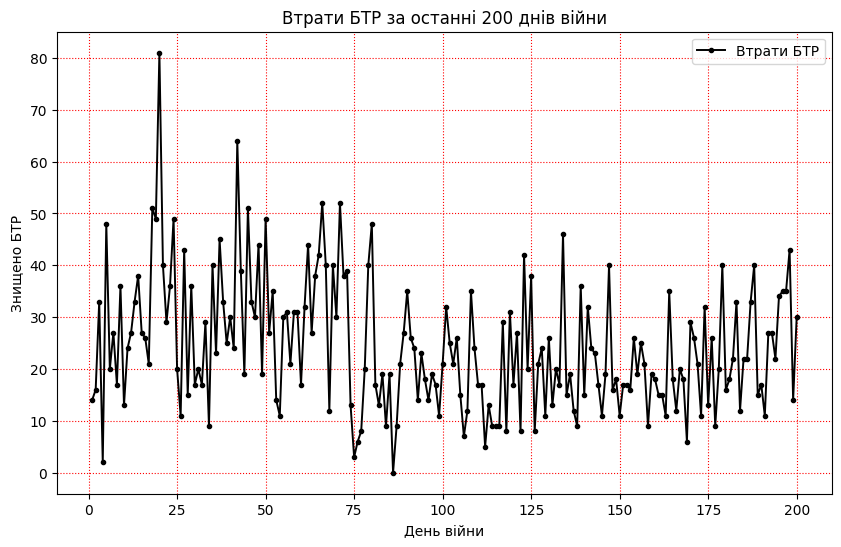

In [8]:
import matplotlib.pyplot as plt
reversed_losses = daily_losses[::-1]

def plot_last_200_days_losses(daily_losses):
    last_200_losses = reversed_losses[:200]
    days = np.arange(1, 201)
    plt.figure(figsize=(10, 6), dpi=100)
    plt.plot(days, last_200_losses, label="Втрати БТР", color='black', marker='.', linewidth=1.4)
    plt.title("Втрати БТР за останні 200 днів війни")
    plt.xlabel("День війни")
    plt.ylabel("Знищено БТР")
    plt.grid(True, color='red', linestyle=':')
    plt.savefig('plot_last_200_days_losses.png', dpi=300)
    plt.legend()
    plt.show()
plot_last_200_days_losses(daily_losses)